---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Gathering, Description and Pre-processing**](#Section4)<br>
5. [**Exploratory Data Analysis**](#Section5)<br>
6. [**Model Preparation - RandomForestClassifier**](#Section6)</br>
7. [**Actionable Insights**](#Section7)</br>

---
<a name = Section1></a>
# **1. Introduction**
---


### AirFi is a air purifying company. ###

- One of the leading Global pollution controller organizations.
- The company is working its way for the betterment of the society by using advanced technologies to purify the air by removing harmful particles from the atmosphere.

### Current Scenario ###
- As we know in recent years the pollution emitted per day has increased drastically, countries all around the world are taking up actions in order to tackle the rapid increase in pollution to avoid global warming.
- Beijing’s pollution authority has collected data for the past 5 years and the data has been passed on to your client by the government of China.
- The company calculates pollution using traditional or manual methods, so it needs a model to do the long process.


---
<a name = Section2></a>
# **2. Problem Statement**
---

- China is notorious for being a major polluter. 
- China’s Environmental Sustainability Index is ranked near the bottom among countries worldwide.
- Air Pollution in Beijing is mainly dominated by coal combustion and vehicles running on the roads. 
- The number of motor vehicles on Beijing’s roads has doubled to 3.3 million with nearly 1200 added each day.

## Project Deliverables ##
- Machine Learning Task: Regression
- Target Variable: PM2.5

## Evaluation Metric ##
 - The model evaluation will be based on the F1 Score.
 
## Task ##
- You are given a dataset of the past few years of the air quality (2013-2017).
- The data is from the 12 stations of Beijing that have been thoroughly observed.
- Your task is to build a regression model using the dataset.


---
<a name = Section3></a>
# **3. Installing and importing Libraries**
---

In [1]:
#installing necessary libraries
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
#!pip install -q yellowbrick

In [2]:
#importing necessary libraries
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
                        # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor                # To implement random forest classifier
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
from sklearn.metrics import mean_squared_error

#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

---
<a name = Section4></a>
# **4. Data Gathering, Description and Pre-processing**
---

In [4]:
# Load the data
beijingTrain = pd.read_csv(filepath_or_buffer='./beijingTrain.csv')
beijingTest = pd.read_csv(filepath_or_buffer='./beijingTest.csv')

# Get the dimensions of data
print('Shape of the train dataset:',beijingTrain.shape)
print('Shape of the test dataset:',beijingTest.shape)

Shape of the train dataset: (403776, 18)
Shape of the test dataset: (16728, 17)


In [5]:
beijingTrain.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
beijingTest.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
1,33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
2,33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
3,33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
4,33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


In [4]:
beijingTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [5]:
beijingTrain.isnull().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

In [4]:
beijingTrain.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,9713.352953,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [7]:
beijingTrain.skew()

REF_NO     0.000000
year      -0.066413
month     -0.053269
day        0.005683
hour       0.000000
PM2.5      1.974287
PM10       1.816482
SO2        3.007737
NO2        1.052701
CO         2.560662
O3         1.635164
TEMP      -0.168698
PRES       0.151948
DEWP      -0.250022
RAIN      29.440245
WSPM       1.625270
dtype: float64

In [62]:
import sweetviz as sv

my_report = sv.analyze(beijingTrain)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
#creating a function to replace null values with their mean()

def replaceNullValues(colName):
    beijingTrain[colName].fillna(beijingTrain[colName].mean(),inplace=True)

In [7]:
replaceNullValues('PM2.5')
replaceNullValues('PM10')
replaceNullValues('SO2')
replaceNullValues('NO2')
replaceNullValues('CO')
replaceNullValues('O3')
replaceNullValues('TEMP')
replaceNullValues('PRES')
replaceNullValues('DEWP')
replaceNullValues('RAIN')
replaceNullValues('WSPM')

In [8]:
beijingTrain.isnull().sum()

REF_NO        0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1389
WSPM          0
station       0
dtype: int64

In [9]:
beijingTrain['wd'] = beijingTrain['wd'].fillna(beijingTrain['wd'].mode()[0])

In [10]:
beijingTrain['wd'].isnull().sum()

0

---
<a name = Section5></a>
# **5. Exploratory Data Analysis**
---

In [11]:
#function for annotating count plot

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [118]:
temp = beijingTrain.groupby('month',as_index=False)['PM2.5','PM10','O3','CO','SO2','NO2'].median()

temp['sum'] = temp.sum(axis=1)

In [119]:
temp

,month,PM2.5,PM10,O3,CO,SO2,NO2,sum
0,1,60.0,84.00,18.0,1400.0,26.0,58.0,1647.00
1,2,53.0,69.00,40.0,1000.0,17.0,43.0,1224.00
2,3,69.0,116.00,50.0,1000.0,18.0,55.0,1311.00
3,4,59.0,104.00,68.0,700.0,9.0,43.0,987.00
4,5,52.0,91.75,80.0,700.0,7.0,37.0,972.75
5,6,54.0,76.00,80.0,800.0,4.0,35.0,1055.00
6,7,57.0,77.00,76.0,900.0,3.0,32.0,1152.00
7,8,42.0,61.00,72.0,800.0,3.0,31.0,1017.00
8,9,48.0,70.00,45.0,800.0,3.0,42.0,1017.00
9,10,55.0,83.00,19.0,900.0,4.0,54.0,1125.00


## 5.1 Sulphur Pollutant distributon across Stations ##

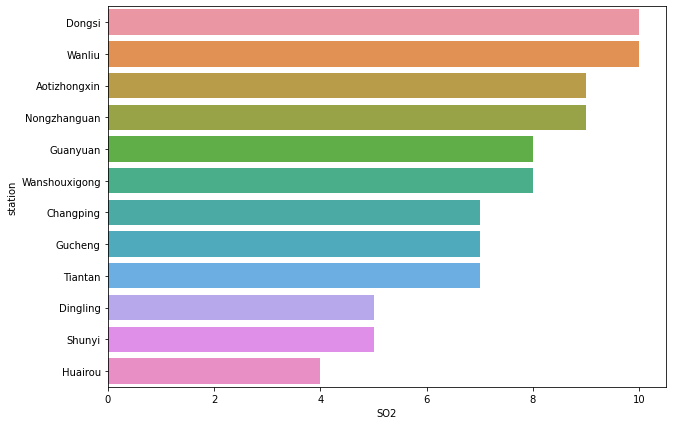

In [13]:
fig = plt.figure(figsize=[10, 7])

sulphurDataByStation = beijingTrain[['PM2.5','PM10','SO2','NO2','CO','O3','station']].groupby('station',as_index=False).median().sort_values(by='SO2',ascending=False)

ax = sns.barplot(y="station", x="SO2", data=sulphurDataByStation)


plt.show()

## 5.1 Pollution distributon across Stations ##

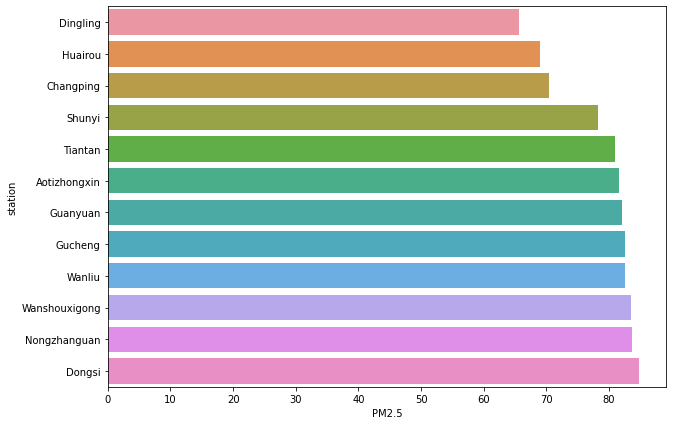

In [94]:
fig = plt.figure(figsize=[10, 7])

sulphurDataByStation = beijingTrain[['PM2.5','PM10','SO2','NO2','CO','O3','station']].groupby('station',as_index=False).mean().sort_values(by='PM2.5')

ax = sns.barplot(y="station", x="PM2.5", data=sulphurDataByStation)


plt.show()

## 5.2 Pollution distribution Year Wise ##

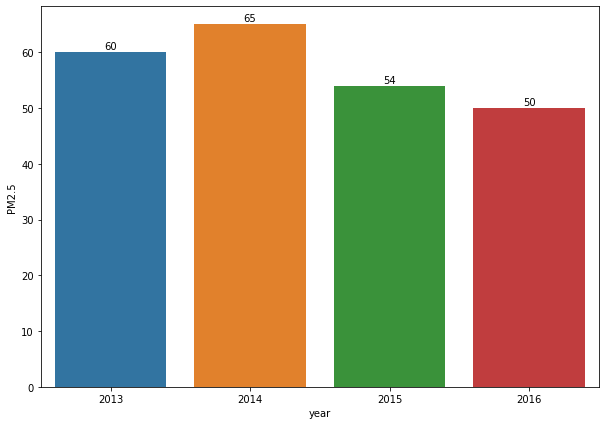

In [14]:
fig = plt.figure(figsize=[10, 7])

pmYearWise = beijingTrain[['PM2.5','PM10','SO2','NO2','CO','O3','year']].groupby('year',as_index=False).median().sort_values(by='PM2.5',ascending=False)

ax = sns.barplot(x="year", y='PM2.5', data=pmYearWise)

show_values(ax)

plt.show()


## 5.3 Heatmap showing correlation between features

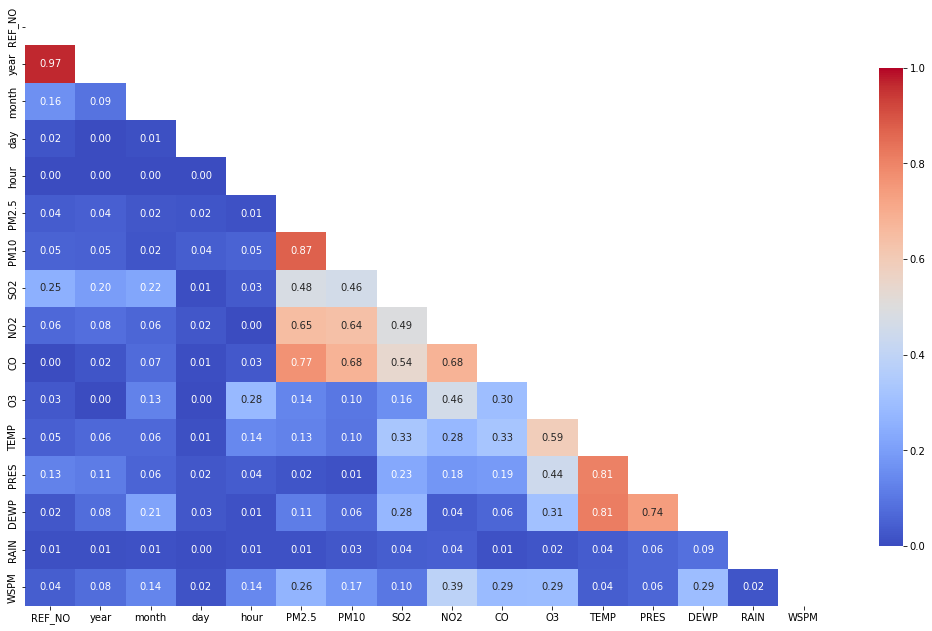

In [15]:
#correlation between various features
#by-default only numerical features are taken

corr = beijingTrain.corr().abs()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(18,11))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1)
# yticks
#plt.yticks(rotation=0)
plt.show()

## Observations ##

-  PM2.5 is highly correlated with PM10
- NO2, CO is highly correlated with PM2.5
- CO is highly correlated with NO2, SO2 (any of the items can be used to check the pollution )
- TEMP is highly correlated with DEWP and PRES
- PRES is highly correlated with DEWP (use any one of the entities)

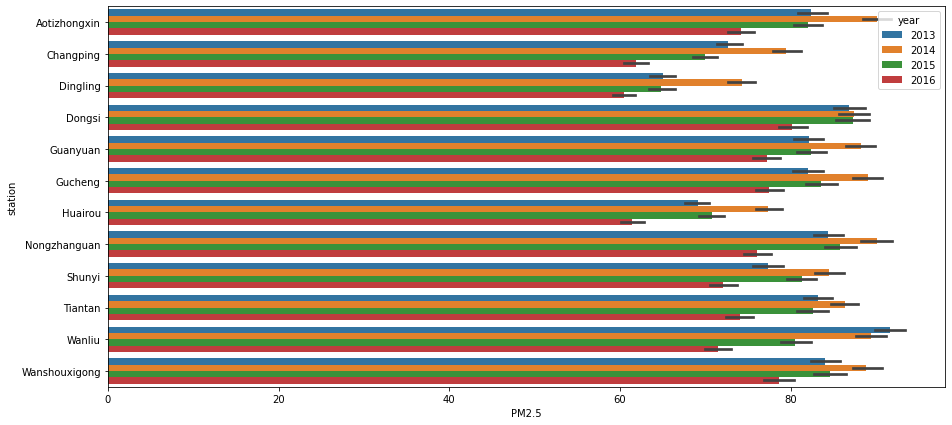

In [24]:
plt.figure(figsize=(15,7))
sns.barplot(y='station',x='PM2.5',hue='year',data=beijingTrain)
plt.show()

## 5.4 Scatter plot showing relation between O3 and PM2.5 over the years

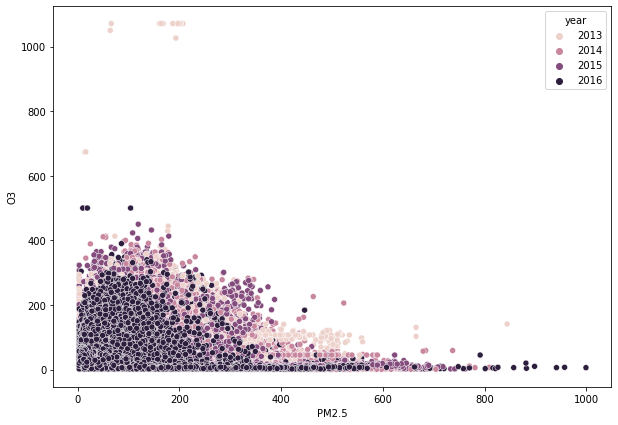

In [143]:
fig = plt.figure(figsize=[10, 7])

#temp = beijingTrain[['PM2.5','SO2','year','month']]

# temp.head()
ax = sns.scatterplot(data = beijingTrain,x='PM2.5',y='O3',hue='year')

plt.show()

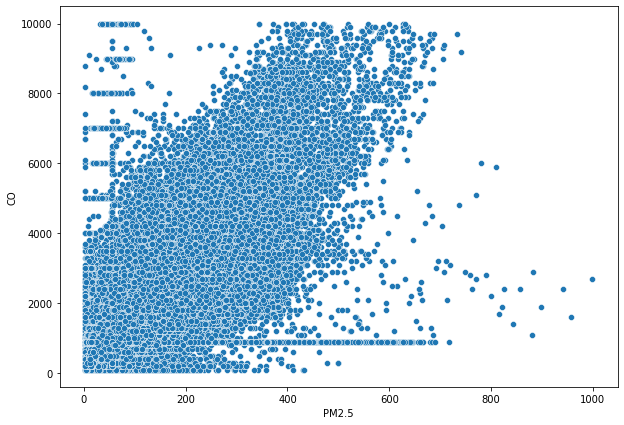

In [138]:
fig = plt.figure(figsize=[10, 7])

ax = sns.scatterplot(data = beijingTrain,x='PM2.5',y='CO')

plt.show()

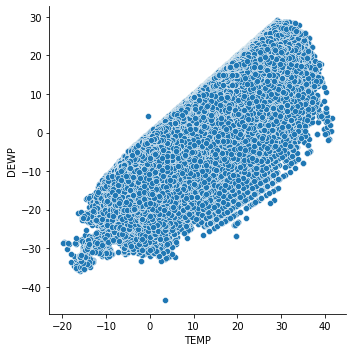

In [142]:
sns.relplot(x='TEMP',y='DEWP',data = beijingTrain)

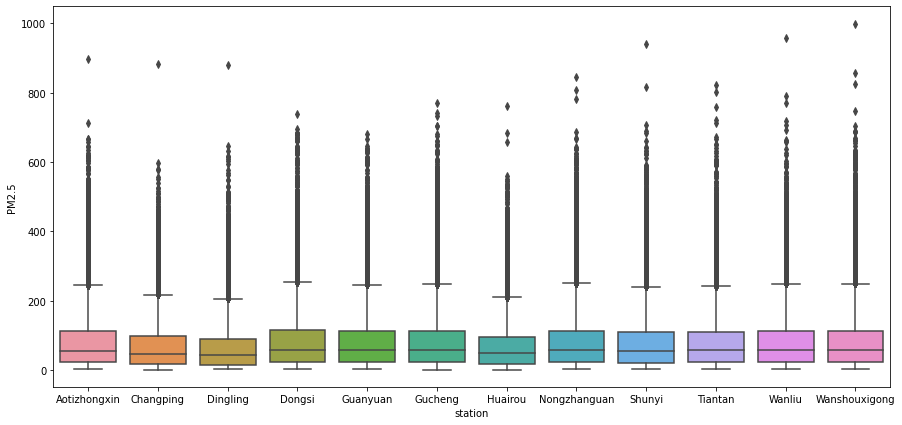

In [187]:
fig = plt.figure(figsize=[15, 7])

sns.boxplot(x='station',y='PM2.5',data=beijingTrain)

plt.show()

---
<a name = Section6></a>
# **6. Model Preparation**
---

## NOTE: Model preparation and its evaluation is done on train data, and the model is used on test data to predict the target variable  - Revenue_Grid ##

## 6.1) Separating the input and output features and Scaling the input features ##

In [25]:
#using Standard Scaler
obj= StandardScaler()
  
# Splitting the independent and dependent variables
i_data = beijingTrain.drop(labels=['REF_NO','PM2.5','year','month','day','hour','O3','wd','station','WSPM','RAIN'],axis=1)

response = beijingTrain['PM2.5']


## 6.2) Splitting the data into train and test ##

In [26]:
X_train,X_test, y_train , y_test = train_test_split(i_data, response,test_size=0.20, random_state=123)

print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (323020, 7)
X_test shape =  (80756, 7)
y_train shape =  (323020,)
y_test shape =  (80756,)


## 6.3) Using LinearRegression ##

In [37]:
lr = LinearRegression(n_jobs=100)
lr.fit(X_train, y_train)

LinearRegression(n_jobs=100)

In [38]:
y_test_pred = lr.predict(X_test)

In [39]:
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8326612601708901
Testing R2
0.8329501047510575


In [40]:
print('Root Mean Squared Error: ', mean_squared_error(y_test,y_test_pred,squared=False))

Root Mean Squared Error:  32.09593863449709


## 6.4) Using DecisionTreeRegressor ##

In [27]:
dt = DecisionTreeRegressor(random_state=123)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [28]:
y_test_pred = dt.predict(X_test)

In [29]:
print("Training R2")
print(dt.score(X_train,y_train))
print("Testing R2")
print(dt.score(X_test,y_test))

Training R2
0.9999970020201167
Testing R2
0.8596839959707372


In [30]:
scoresdt = cross_val_score(dt,X_train,y_train,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))

[0.85255301 0.85003494 0.85000307 0.85444254 0.84963473 0.85566409
 0.85751503 0.85587564 0.85728624 0.86107936]
Average R2
0.8544088644440327


In [31]:
print('Root Mean Squared Error: ', mean_squared_error(y_test,y_test_pred,squared=False))

Root Mean Squared Error:  29.415794391828108


## 6.5) Using RandomForestRegressor ##

In [45]:
rf = RandomForestRegressor(n_estimators=100,random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [33]:
y_test_pred = rf.predict(X_test)

In [35]:
print("Training R2")
print(rf.score(X_train,y_train))
print("Testing R2")
print(rf.score(X_test,y_test))

Training R2
0.9900381433960728
Testing R2
0.9310126967620918


In [41]:
scoresrf = cross_val_score(rf,X_train,y_train,cv=5)
print(scoresrf)
print("Average R2")
print(np.mean(scoresrf))

[0.92374054 0.92493902 0.92591293 0.92930166 0.92877678]
Average R2
0.9265341847419398


In [34]:
print('Root Mean Squared Error: ', mean_squared_error(y_test,y_test_pred,squared=False))

Root Mean Squared Error:  20.625836052592792


## 6.5) Using the test data to predict the target variable

### 6.5.1) Storing the input features in X_test

In [51]:
X_test_new = beijingTest.drop(labels=['REF_NO','year','month','day','hour','O3','wd','station','WSPM','RAIN'],axis=1)

### 6.5.2) Predicting the target feature based on X_test

In [52]:
y_pred = rf.predict(X_test_new)

In [53]:
y_pred

array([471.9 , 458.81, 431.93, ...,  13.29,  13.38,  12.89])

### 6.5.3) Storing the result of predicted variable in output file

In [54]:
output = pd.DataFrame({'REF_NO': beijingTest.REF_NO, 'PM2.5': y_pred})
output.to_csv('submission.csv', index=False, header=False)

---
<a name = Section7></a>
# **7. Actionable Insights**
---

### Insights for High net worth Individuals

- Incentivise customers who are in the age group of 36-40 followed by 45-50 and 41-45.
- Offer discount schemes for Professionals 
- Offer discounts targeted to Female customers.
- Offer discounts to Retired customers to encourage them to invest in trading
- Offer discounts to TOP 3 regions viz. South East, North West and Northern Ireland respectively.